In [61]:
import numpy as np
import pandas as pd

In [62]:
!ls ../input/titanic

gender_submission.csv  test.csv  train.csv


In [63]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [64]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
data = pd.concat([train, test], sort=False)

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
print(len(train), len(test), len(data))

891 418 1309


In [70]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [71]:
data['Sex'].replace(['male','female'], [0, 1], inplace=True)

In [72]:
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [73]:
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['fare_value']=data['Fare']/50

In [74]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()
data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)
data['age_value']=data['Age']/50

In [75]:
data['family'] = (data['SibSp'] + data['Parch'])/5 

In [76]:
data['isAlone'] = 0
data.loc[data['family'] > 0, 'isAlone'] = 1

In [77]:
delete_columns = ['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Age','Fare']
data.drop(delete_columns, axis=1, inplace=True)

In [78]:
train = data[:len(train)]
test = data[len(train):]

In [79]:
y_train0 = train['Survived']
X_train0 = train.drop('Survived', axis = 1)
X_test0 = test.drop('Survived', axis = 1)

In [80]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5,    # 分割を1個生成
                  train_size=0.9,  # 学習
                  test_size =0.1,  # テスト
                  random_state=1)  # 乱数種（再現用）

In [81]:
X = np.array(X_train0)
y = np.array(y_train0)

In [82]:
X.shape

(891, 7)

In [83]:
y.shape

(891,)

In [84]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist

from keras.models import Sequential 
from keras.layers.core import Dense, Activation, Dropout, Flatten

from keras.optimizers import SGD
from keras.utils import np_utils
from keras import metrics

In [85]:
%matplotlib inline
print(__doc__)

Automatically created module for IPython interactive environment


In [86]:
NB_EPOCH = 100   #CHAMPION400
VERBOSE = 1
OPTIMIZER = SGD() 
BATCH_SIZE = 32
NB_CLASSES = 2

N_HIDDEN0 = 256
N_HIDDEN1 = 128
N_HIDDEN2 = 64

DROPOUT = 0.5  #CHAMPION0
VALIDATION_SPLIT = 0.5  #CHAMPION0.5
RESHAPED = 7

In [87]:
model = Sequential()

model.add (Dense(N_HIDDEN0, input_shape = (RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))


model.add (Dense(N_HIDDEN1))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add (Dense(N_HIDDEN2))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))


model.add (Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 0s 353us/step - loss: 0.7019 - accuracy: 0.5646 - val_loss: 0.6501 - val_accuracy: 0.6145
Epoch 2/10
712/712 [==============================] - 0s 72us/step - loss: 0.7101 - accuracy: 0.5674 - val_loss: 0.6385 - val_accuracy: 0.6145
Epoch 3/10
712/712 [==============================] - 0s 68us/step - loss: 0.6761 - accuracy: 0.5983 - val_loss: 0.6276 - val_accuracy: 0.6145
Epoch 4/10
712/712 [==============================] - 0s 71us/step - loss: 0.6585 - accuracy: 0.6236 - val_loss: 0.6176 - val_accuracy: 0.6145
Epoch 5/10
712/712 [==============================] - 0s 69us/step - loss: 0.6603 - accuracy: 0.6348 - val_loss: 0.6102 - val_accuracy: 0.6704
Epoch 6/10
712/712 [==============================] - 0s 71us/step - loss: 0.6634 - accuracy: 0.6152 - val_loss: 0.6024 - val_accuracy: 0.6704
Epoch 7/10
712/712 [==============================] - 0s 68us/step - loss: 0.6602 - accuracy: 0

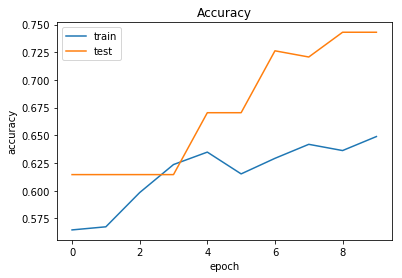

179/179 [==============================] - 0s 42us/step
Test score: 0.5669296585314767
Test accuracy: 0.74301677942276
Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 0s 364us/step - loss: 0.6251 - accuracy: 0.6433 - val_loss: 0.5963 - val_accuracy: 0.6872
Epoch 2/10
712/712 [==============================] - 0s 71us/step - loss: 0.5931 - accuracy: 0.6896 - val_loss: 0.5898 - val_accuracy: 0.6927
Epoch 3/10
712/712 [==============================] - 0s 70us/step - loss: 0.6024 - accuracy: 0.6840 - val_loss: 0.5853 - val_accuracy: 0.6927
Epoch 4/10
712/712 [==============================] - 0s 72us/step - loss: 0.5981 - accuracy: 0.6854 - val_loss: 0.5810 - val_accuracy: 0.6983
Epoch 5/10
712/712 [==============================] - 0s 70us/step - loss: 0.5692 - accuracy: 0.7247 - val_loss: 0.5753 - val_accuracy: 0.7095
Epoch 6/10
712/712 [==============================] - 0s 71us/step - loss: 0.5860 - accuracy: 0.7163 - val_loss: 0.5721

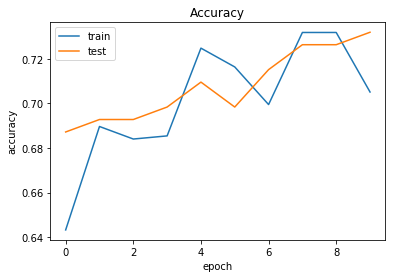

179/179 [==============================] - 0s 37us/step
Test score: 0.5601176243254592
Test accuracy: 0.7318435907363892
Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 0s 383us/step - loss: 0.5576 - accuracy: 0.7346 - val_loss: 0.5147 - val_accuracy: 0.7765
Epoch 2/10
712/712 [==============================] - 0s 67us/step - loss: 0.5732 - accuracy: 0.7275 - val_loss: 0.5101 - val_accuracy: 0.8156
Epoch 3/10
712/712 [==============================] - 0s 71us/step - loss: 0.5599 - accuracy: 0.7205 - val_loss: 0.5074 - val_accuracy: 0.8101
Epoch 4/10
712/712 [==============================] - 0s 70us/step - loss: 0.5501 - accuracy: 0.7289 - val_loss: 0.5052 - val_accuracy: 0.8101
Epoch 5/10
712/712 [==============================] - 0s 71us/step - loss: 0.5625 - accuracy: 0.7163 - val_loss: 0.5026 - val_accuracy: 0.8156
Epoch 6/10
712/712 [==============================] - 0s 70us/step - loss: 0.5602 - accuracy: 0.7416 - val_loss: 0.49

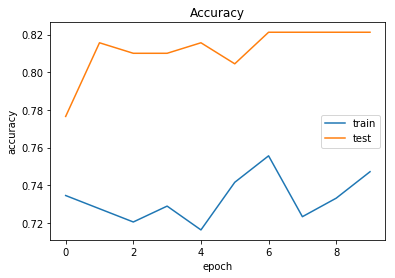

179/179 [==============================] - 0s 39us/step
Test score: 0.48817329033793017
Test accuracy: 0.8212290406227112
Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 0s 383us/step - loss: 0.5333 - accuracy: 0.7528 - val_loss: 0.5252 - val_accuracy: 0.7709
Epoch 2/10
712/712 [==============================] - 0s 69us/step - loss: 0.5295 - accuracy: 0.7612 - val_loss: 0.5243 - val_accuracy: 0.7709
Epoch 3/10
712/712 [==============================] - 0s 70us/step - loss: 0.5438 - accuracy: 0.7402 - val_loss: 0.5233 - val_accuracy: 0.7877
Epoch 4/10
712/712 [==============================] - 0s 72us/step - loss: 0.5283 - accuracy: 0.7472 - val_loss: 0.5230 - val_accuracy: 0.7877
Epoch 5/10
712/712 [==============================] - 0s 69us/step - loss: 0.5199 - accuracy: 0.7528 - val_loss: 0.5205 - val_accuracy: 0.7765
Epoch 6/10
712/712 [==============================] - 0s 68us/step - loss: 0.5236 - accuracy: 0.7753 - val_loss: 0.5

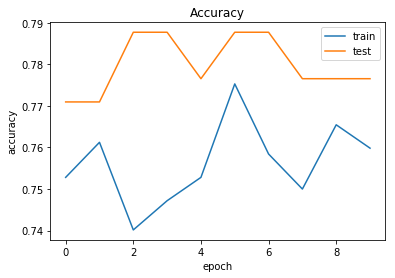

179/179 [==============================] - 0s 39us/step
Test score: 0.5175522878849307
Test accuracy: 0.7765362858772278
Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 0s 411us/step - loss: 0.5326 - accuracy: 0.7500 - val_loss: 0.4661 - val_accuracy: 0.8156
Epoch 2/10
712/712 [==============================] - 0s 72us/step - loss: 0.5126 - accuracy: 0.7654 - val_loss: 0.4657 - val_accuracy: 0.7989
Epoch 3/10
712/712 [==============================] - 0s 70us/step - loss: 0.5262 - accuracy: 0.7570 - val_loss: 0.4656 - val_accuracy: 0.7989
Epoch 4/10
712/712 [==============================] - 0s 69us/step - loss: 0.5190 - accuracy: 0.7528 - val_loss: 0.4628 - val_accuracy: 0.8156
Epoch 5/10
712/712 [==============================] - 0s 68us/step - loss: 0.5254 - accuracy: 0.7626 - val_loss: 0.4633 - val_accuracy: 0.8101
Epoch 6/10
712/712 [==============================] - 0s 69us/step - loss: 0.5164 - accuracy: 0.7654 - val_loss: 0.46

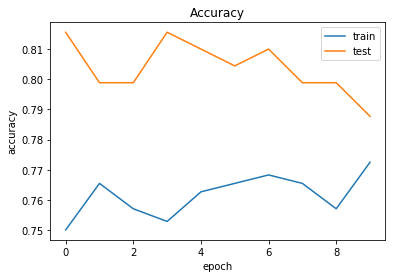

179/179 [==============================] - 0s 41us/step
Test score: 0.4606968971937062
Test accuracy: 0.7877094745635986


In [88]:
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
    
ss = ShuffleSplit(n_splits=5,    # 分割を1個生成
                  train_size=0.8,  # 学習
                  test_size =0.2,  # テスト
                  random_state=0)  # 乱数種（再現用）

for train_index, test_index in ss.split(X): 

    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = OPTIMIZER,
                 metrics = ['accuracy'])    
    
    history = model.fit(X_train, Y_train, 
                        validation_data = (X_test, Y_test), 
                        epochs=NB_EPOCH, 
                        batch_size=BATCH_SIZE) 
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train','test'])

    plt.show() 
    
    score = model.evaluate (X_test, Y_test, verbose = VERBOSE )   
    
    print("Test score:", score[0])
    print('Test accuracy:', score[1])  

In [89]:
y_pred = model.predict(X_test0)

In [90]:
y_pred[:20]

array([[0.8003501 , 0.19964989],
       [0.5111498 , 0.48885015],
       [0.72523075, 0.27476928],
       [0.87410104, 0.12589891],
       [0.45477593, 0.5452241 ],
       [0.8636009 , 0.1363991 ],
       [0.28545177, 0.71454823],
       [0.73268515, 0.26731485],
       [0.35991165, 0.6400883 ],
       [0.82468885, 0.17531115],
       [0.87833613, 0.12166384],
       [0.6594198 , 0.34058028],
       [0.18422727, 0.8157727 ],
       [0.7716597 , 0.22834031],
       [0.20105943, 0.7989406 ],
       [0.22570512, 0.7742949 ],
       [0.6731143 , 0.3268857 ],
       [0.83512485, 0.1648751 ],
       [0.4606138 , 0.53938615],
       [0.40551725, 0.5944827 ]], dtype=float32)

In [91]:
y_pred_life=[]
for i in range(len(y_pred)):
    if y_pred[i][0]>y_pred[i][1]:
        y_pred_life.append(0)
    else:
        y_pred_life.append(1)  
y_pred_life

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [92]:
sub = gender_submission
sub['Survived'] = list(map(int, y_pred_life))
sub.to_csv("submission.csv", index=False)

In [93]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
